In [1]:
import params
import curveTreeDB
allModels = curveTreeDB.getModels(params.treeModels, ticker = None, returnEntireObject = True)

In [2]:
import pandas as pd
cleanedModels = []
for item in allModels:
    del item["model"]
    try:
        del item["series"]
    except:
        pass
#     del item["ticker"]
    itemKeys= list(item.keys())
    for key in itemKeys:
        if key.startswith("OOS") and key != "OOS_SHARPE" and key != "OOS_SHARPE SLIPPAGE" and key != "OOS_SHARPE DIFFERENCE" and key != "OOS_ALPHA SLIPPAGE":
            del item[key]
    cleanedModels.append(item)


In [3]:
len(cleanedModels)

8703

IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE


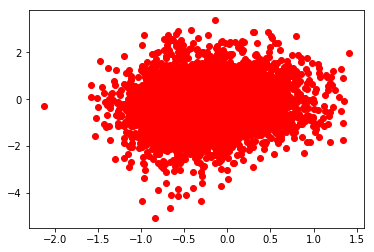

IS_25TH PERCENTILE SHARPE


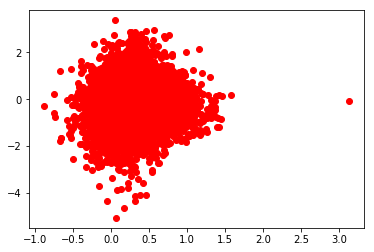

IS_25TH PERCENTILE SHARPE DIFFERENCE


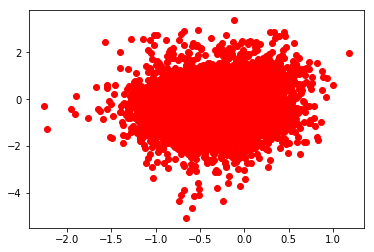

IS_ACTIVITY


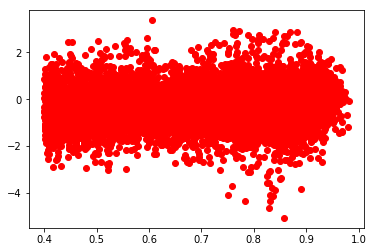

IS_ALPHA


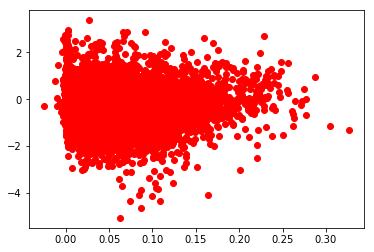

IS_ALPHA SLIPPAGE


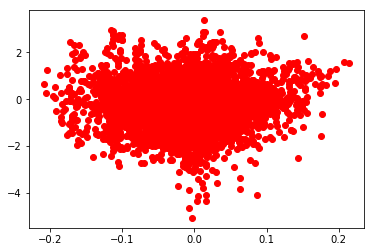

IS_ANNUALIZED RETURN


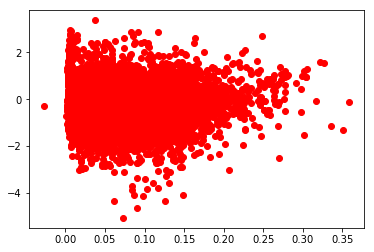

IS_BETA


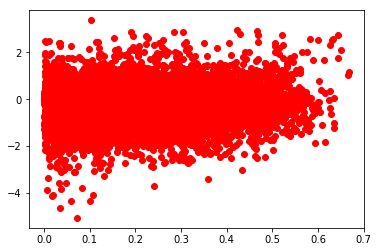

IS_EXTREME STABILITY


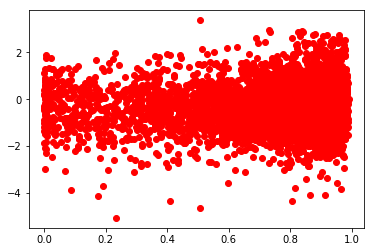

IS_EXTREME STABILITY ROLLING 600


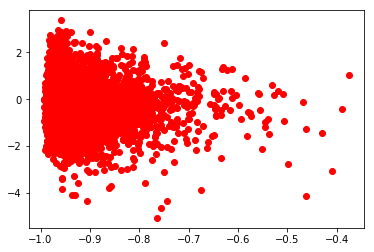

IS_FACTOR SHARPE


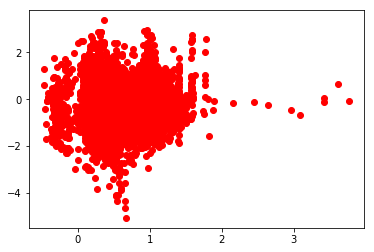

IS_MIN ROLLING SHARPE


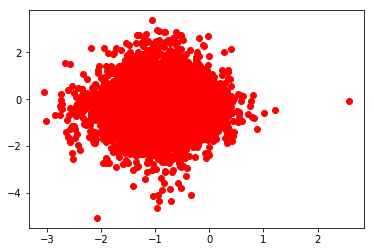

IS_ONE STD SHARPE


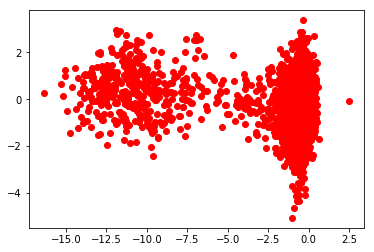

IS_RAW BETA


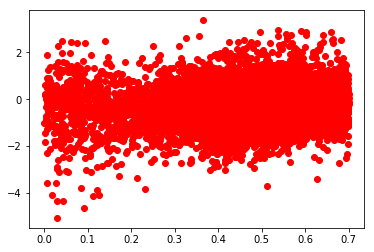

IS_RELATIVE SHARPE


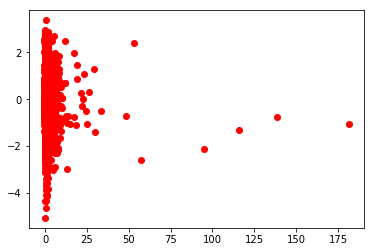

IS_RELATIVE SHARPE DIFFERENCE AVERAGE


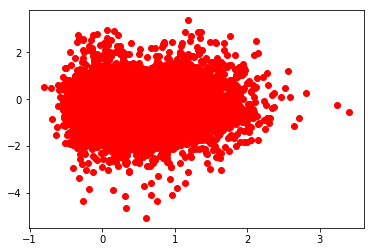

IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0


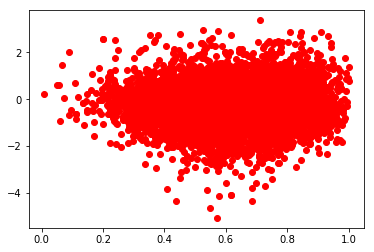

IS_RELATIVE SHARPE DIFFERENCE MIN


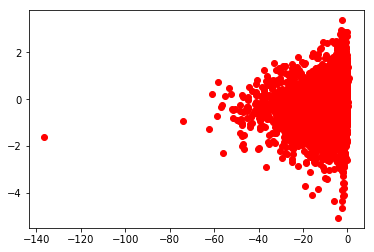

IS_RELATIVE SHARPE SLIPPAGE


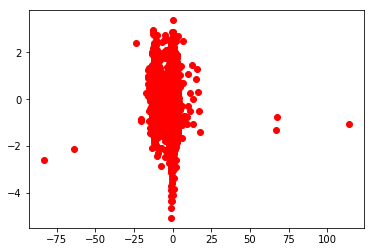

IS_ROLLING SHARPE BETA


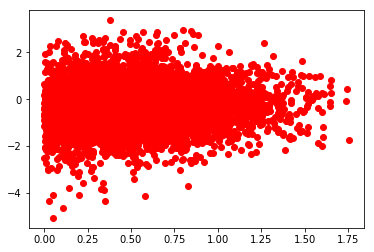

IS_ROLLING SHARPE ERROR


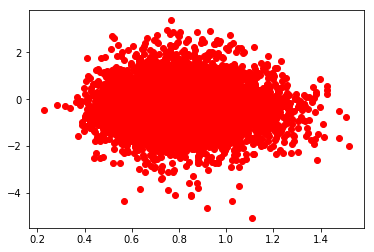

IS_ROLLING SHARPE STABILITY


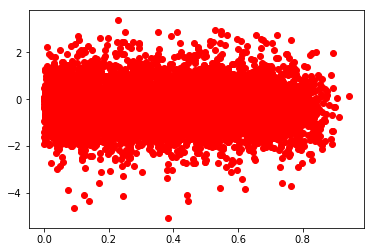

IS_SHARPE


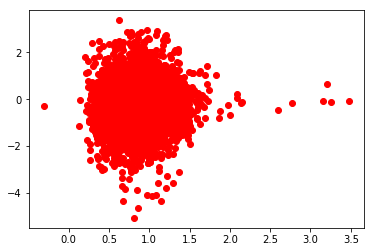

IS_SHARPE DIFFERENCE


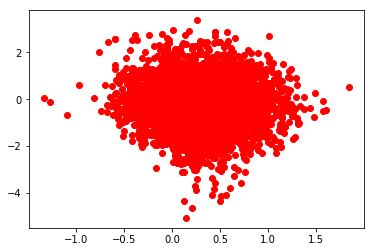

IS_SHARPE DIFFERENCE AVERAGE


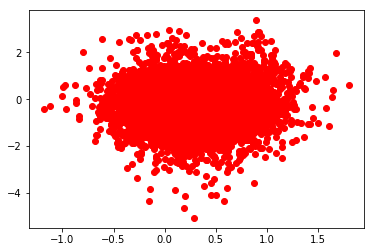

IS_SHARPE DIFFERENCE GREATER THAN 0


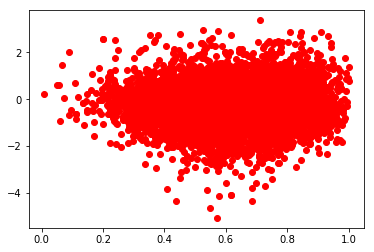

IS_SHARPE DIFFERENCE MIN


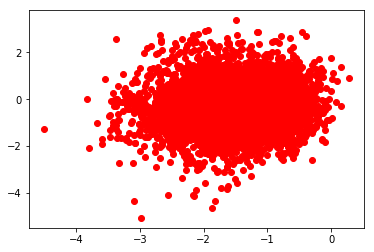

IS_SHARPE DIFFERENCE SLIPPAGE


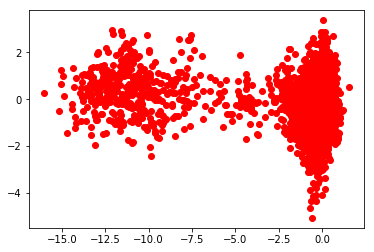

IS_SHARPE SLIPPAGE


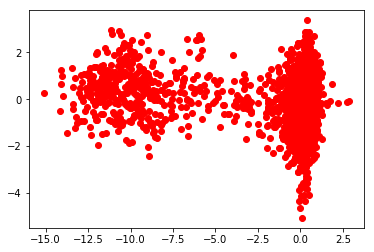

IS_SHARPE SLIPPAGE DECAY


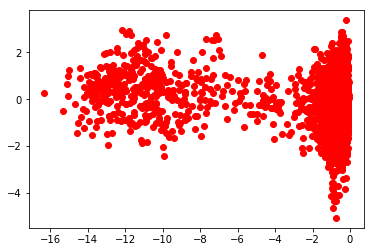

IS_SMART INFORMATION RATIO


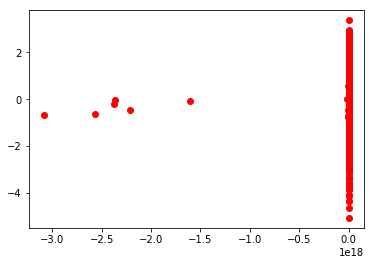

IS_STABILITY


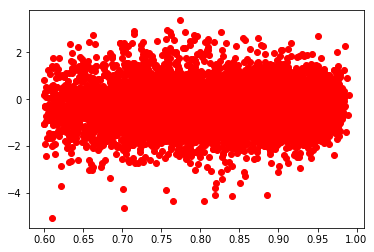

IS_TOTAL DAYS SEEN


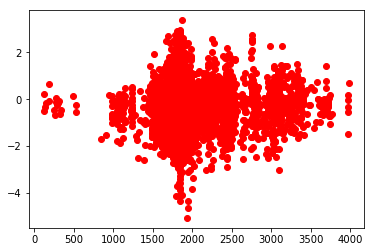

IS_TREYNOR


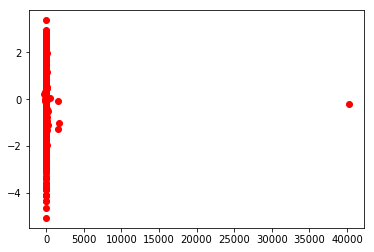

OOS_ALPHA SLIPPAGE


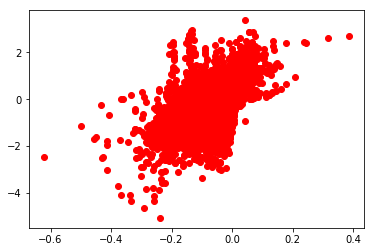

OOS_SHARPE


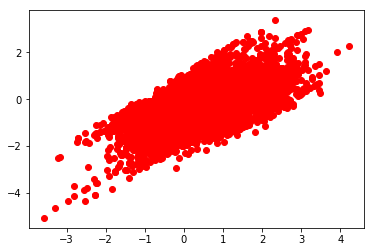

OOS_SHARPE DIFFERENCE


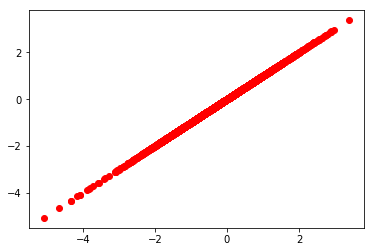

OOS_SHARPE SLIPPAGE


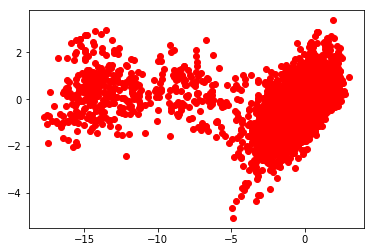

combiner
combiner
AND    0.759693
OR     0.784687
Name: OOS_SHARPE, dtype: float64
combiner
AND   -0.492034
OR    -0.933814
Name: OOS_SHARPE SLIPPAGE, dtype: float64
combiner
AND   -0.036467
OR    -0.072567
Name: OOS_ALPHA SLIPPAGE, dtype: float64
combiner
AND   -0.889153
OR    -1.095178
Name: OOS_SHARPE SLIPPAGE, dtype: float64
numberOfPredictors
numberOfPredictors
2    0.692368
3    0.790052
4    0.849259
5    0.910366
6    0.808262
7    0.934745
8    0.791000
Name: OOS_SHARPE, dtype: float64
numberOfPredictors
2   -0.434136
3   -1.020749
4   -1.053763
5   -0.018368
6    0.024382
7    0.078110
8    0.095220
Name: OOS_SHARPE SLIPPAGE, dtype: float64
numberOfPredictors
2   -0.063668
3   -0.062725
4   -0.053495
5   -0.049756
6   -0.038473
7   -0.034986
8   -0.047992
Name: OOS_ALPHA SLIPPAGE, dtype: float64
numberOfPredictors
2   -1.050262
3   -1.069588
4   -0.949664
5   -0.679710
6   -0.462523
7   -0.401891
8   -0.426423
Name: OOS_SHARPE SLIPPAGE, dtype: float64


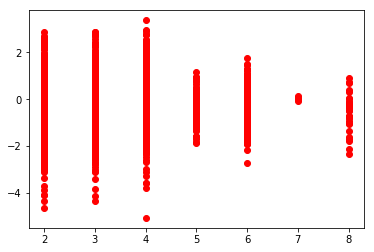

predictionLength
predictionLength
2     0.563009
3     0.685238
5     0.855523
7     0.819102
10    0.847612
15    0.802666
Name: OOS_SHARPE, dtype: float64
predictionLength
2    -3.145650
3    -1.892374
5    -0.261982
7     0.191051
10   -0.019191
15    0.511603
Name: OOS_SHARPE SLIPPAGE, dtype: float64
predictionLength
2    -0.145919
3    -0.087895
5    -0.050515
7    -0.034696
10   -0.018532
15   -0.015161
Name: OOS_ALPHA SLIPPAGE, dtype: float64
predictionLength
2    -2.671226
3    -1.657051
5    -0.644073
7    -0.430484
10   -0.195298
15   -0.153334
Name: OOS_SHARPE SLIPPAGE, dtype: float64


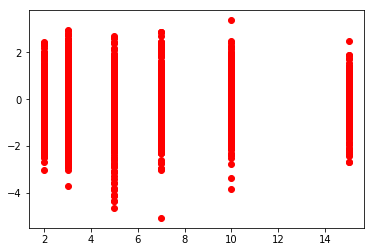

ticker


In [4]:
cm = pd.DataFrame(cleanedModels)
for col in cm.columns.values:
    print(col)
    try:
        import matplotlib.pyplot as plt
        groupsSharpe = cm.groupby([col])["OOS_SHARPE"].mean()
        groupsSharpeSlippage = cm.groupby([col])["OOS_SHARPE SLIPPAGE"].mean()
        groupsAlphaSlippage = cm.groupby([col])["OOS_ALPHA SLIPPAGE"].mean()
        groupsQuantile =cm.groupby([col])["OOS_SHARPE SLIPPAGE"].quantile(q=0.25)
        if len(groupsSharpe) < 10:
            print(groupsSharpe)
            print(groupsSharpeSlippage)
            print(groupsAlphaSlippage)
            print(groupsQuantile)
        xVals = cm[[col]].values
        yVals = cm[["OOS_SHARPE DIFFERENCE"]].values
        plt.plot(xVals, yVals, 'ro')
        plt.show()
        plt.draw()
    except:
        continue
    



In [193]:
cm = pd.DataFrame(cleanedModels).dropna()
cmInput = cm[list(set(cm.columns.values) - set(["OOS_SHARPE DIFFERENCE", "IS_FACTOR SHARPE", "IS_RAW BETA",  "OOS_SHARPE", "OOS_SHARPE SLIPPAGE", "combiner", "ticker"]))]
cmOutput = cm[["OOS_SHARPE DIFFERENCE"]]

In [194]:
cmInput.columns

Index(['IS_EXTREME STABILITY', 'IS_ALPHA SLIPPAGE',
       'IS_25TH PERCENTILE SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE', 'IS_TREYNOR',
       'numberOfPredictors', 'IS_SHARPE SLIPPAGE', 'IS_ANNUALIZED RETURN',
       'IS_TOTAL DAYS SEEN', 'IS_ROLLING SHARPE STABILITY',
       'IS_RELATIVE SHARPE', 'IS_SHARPE DIFFERENCE MIN',
       'IS_SMART INFORMATION RATIO', 'IS_ONE STD SHARPE',
       'IS_25TH PERCENTILE RELATIVE SHARPE DIFFERENCE',
       'IS_SHARPE DIFFERENCE SLIPPAGE', 'IS_SHARPE SLIPPAGE DECAY', 'IS_BETA',
       'IS_ACTIVITY', 'IS_25TH PERCENTILE SHARPE', 'predictionLength',
       'IS_STABILITY', 'IS_SHARPE DIFFERENCE AVERAGE', 'IS_SHARPE DIFFERENCE',
       'IS_RELATIVE SHARPE SLIPPAGE',
       'IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0',
       'IS_ROLLING SHARPE BETA', 'IS_SHARPE DIFFERENCE GREATER THAN 0',
       'IS_EXTREME STABILITY ROLLING 600', 'IS_ALPHA',
       'IS_RELATIVE SHARPE DIFFERENCE MIN', 'IS_ROLLING SHARPE ERROR',


In [195]:
cmInput

,IS_EXTREME STABILITY,IS_ALPHA SLIPPAGE,IS_25TH PERCENTILE SHARPE DIFFERENCE,IS_RELATIVE SHARPE DIFFERENCE AVERAGE,IS_SHARPE,IS_TREYNOR,numberOfPredictors,IS_SHARPE SLIPPAGE,IS_ANNUALIZED RETURN,IS_TOTAL DAYS SEEN,...,IS_SHARPE DIFFERENCE,IS_RELATIVE SHARPE SLIPPAGE,IS_RELATIVE SHARPE DIFFERENCE GREATER THAN 0,IS_ROLLING SHARPE BETA,IS_SHARPE DIFFERENCE GREATER THAN 0,IS_EXTREME STABILITY ROLLING 600,IS_ALPHA,IS_RELATIVE SHARPE DIFFERENCE MIN,IS_ROLLING SHARPE ERROR,IS_MIN ROLLING SHARPE
0,0.894353,0.024758,0.175650,0.675437,1.269128,-0.097305,2,0.724259,0.133477,1744,...,0.457949,-0.107153,0.878768,1.018918,0.878768,-0.950010,0.080945,-2.163291,0.895723,-0.354933
1,0.831139,0.006916,-0.695773,-0.129268,0.628492,0.048653,2,0.189506,0.096373,2037,...,0.186871,-0.570886,0.459686,0.387119,0.459686,-0.947509,0.081178,-18.496237,0.619889,-1.124320
2,0.948945,0.013766,-0.251761,0.272559,1.128318,-0.290330,2,0.500083,0.096603,2472,...,0.447959,-0.264972,0.639802,0.194975,0.639802,-0.973024,0.067065,-0.826170,0.490482,0.093114
3,0.900520,0.030273,0.188593,0.818705,0.956416,0.471542,2,0.551259,0.063255,1742,...,0.763158,1.852453,0.798122,0.330278,0.798122,-0.788347,0.057209,-1.470854,0.897204,-0.836832
4,0.568942,-0.033652,-1.167552,-0.388469,0.920025,-1.376700,2,-0.257625,0.098059,1948,...,0.096265,-1.312742,0.353565,0.391514,0.353565,-0.880023,0.093587,-1.600322,0.675868,-0.996843
5,0.966962,-0.125269,-0.560736,-0.211856,0.913847,-0.181762,2,-0.277751,0.131777,1876,...,-0.126452,-1.266991,0.372923,0.330115,0.372923,-0.934339,0.049775,-5.116117,0.793027,-0.868487
6,0.900418,-0.005503,-0.856553,-0.394172,0.816747,-3.541779,2,0.333819,0.022518,1875,...,-0.425210,-0.731215,0.308498,0.267199,0.308498,-0.964373,0.007951,-2.673433,0.862157,-0.405936
7,0.830910,0.025786,-0.467776,-0.144367,0.782197,0.138114,2,0.318984,0.111503,2037,...,0.340576,-0.277697,0.403135,0.581515,0.403135,-0.958367,0.094991,-15.517465,0.782112,-0.734206
8,0.885403,-0.072214,-0.667763,-0.115201,0.828277,-0.203998,2,-0.015408,0.115194,1853,...,-0.060225,-1.017342,0.443196,0.737172,0.443196,-0.930605,0.049284,-25.866522,0.791972,-1.370281
9,0.578649,-0.141544,-0.777884,-0.103535,0.942719,-0.018704,2,-13.449209,0.005750,1850,...,-0.000803,-15.254259,0.428393,1.085181,0.428393,-0.934085,0.003834,-4.605931,0.985889,-1.259068


In [196]:
len(cmOutput[cmOutput > 0].dropna())/len(cmOutput.dropna())

0.3185404339250493

In [197]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [207]:
cmOutput

,OOS_SHARPE DIFFERENCE
0,-0.389076
1,-0.555811
2,0.639304
3,-0.084324
4,0.130381
5,-0.179134
6,-0.011525
7,-0.173473
8,-0.221728
9,1.328103


In [203]:
dtreg = DecisionTreeRegressor(min_samples_leaf=30).fit(cmInput[:750], cmOutput[:750])

In [204]:
tree.export_graphviz(dtreg, out_file='tree.dot')

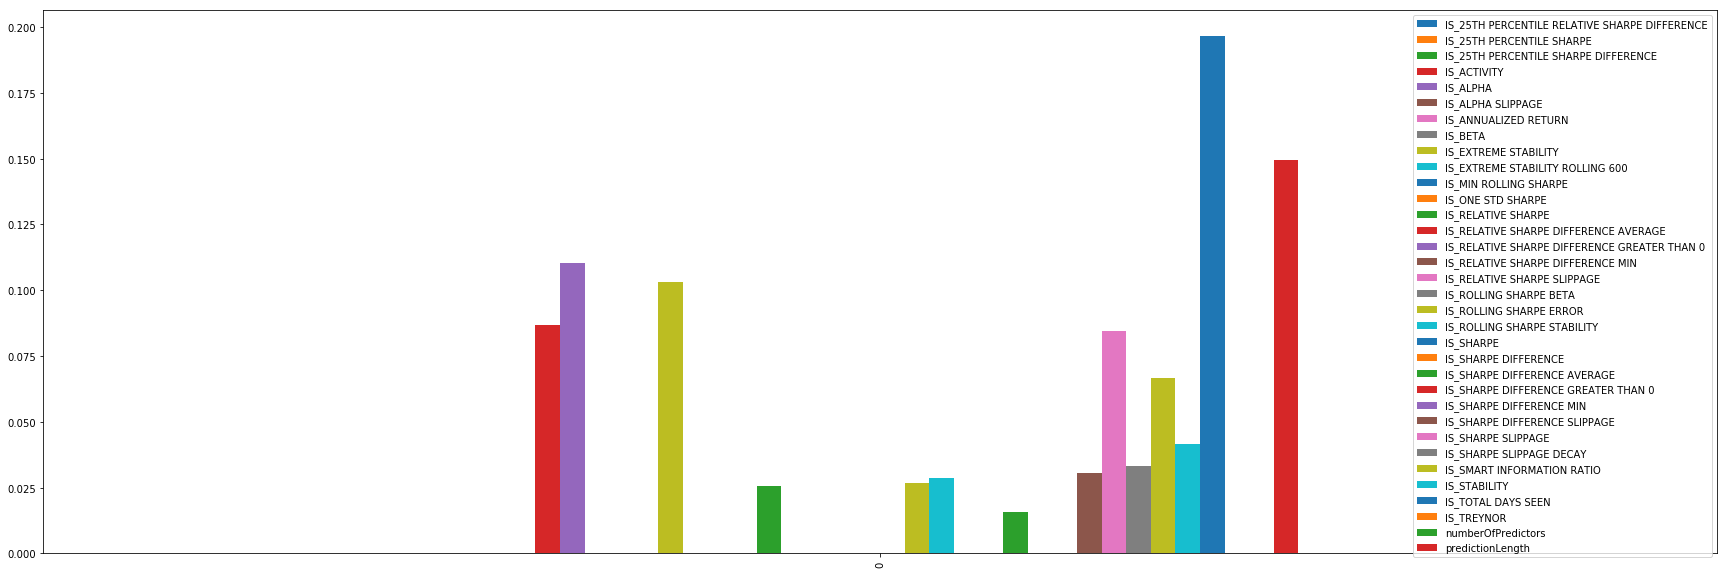

In [205]:
mapper = {}
for i in range(len(cmInput.columns)):
    mapper[cmInput.columns[i]] = dtreg.feature_importances_[i]
%matplotlib inline
pd.DataFrame([mapper]).plot.bar(figsize=(30,10))

In [208]:
pd.DataFrame(dtreg.predict(cmInput[750:]), index=cmOutput[750:].index, columns=["Predicted OOS_SHARPE DIFFERENCE"]).join(cmOutput[750:])

,Predicted OOS_SHARPE DIFFERENCE,OOS_SHARPE DIFFERENCE
751,-0.985127,-0.093945
752,0.239407,0.511387
753,0.239407,0.324767
754,-0.008772,0.716352
755,-0.423803,0.332160
756,0.078780,0.571654
757,-0.389904,0.338736
758,-0.985127,-1.035398
759,0.015560,0.228423
760,-1.334179,-1.683748
